## The Sharpe Ratio
Allows us to quantify the relationship between the mean daily return and the volatility or standard deviation of the stock
Essentially we have (Expected Portfolio Return - Risk Free Return) / (Portfolio Standard Deviation)

In [1]:
import quandl
import modin.pandas as pd
from quandlAPIKey import API_KEY
import matplotlib.pyplot as plt
%matplotlib inline

### if you have not already, head on over to: https://docs.quandl.com/docs/python-installation
create a free account and add your API key below

In [2]:
# quandl.ApiConfig.api_key = "YOURAPIKEY"
quandl.ApiConfig.api_key = API_KEY

## First we will run some portfolio allocation code, so we can get some use out of the Sharpe ratio

In [3]:
portfolio_initial = 100000

In [4]:
start_range = pd.to_datetime('2015-01-01')
end_range = pd.to_datetime('2020-01-01')

In [5]:
aapl = quandl.get("WIKI/AAPL.11", start_date=start_range, end_date=end_range)
plug = quandl.get("WIKI/PLUG.11", start_date=start_range, end_date=end_range)
nee = quandl.get("WIKI/NEE.11", start_date=start_range, end_date=end_range)
fcel = quandl.get("WIKI/FCEL.11", start_date=start_range, end_date=end_range)

In [6]:
aapl.head(5)

,Adj. Close
Date,
2015-01-02,103.863957
2015-01-05,100.937944
2015-01-06,100.947444
2015-01-07,102.362951
2015-01-08,106.295968


In [7]:
# We are only concerned with the adjusted closing price of the stock, but if we wanted more we could have done: "WIKI/AAPL" and returned all of the columns of our dataset from Quandl

In [8]:
for stock_df in [aapl, plug, nee, fcel]:
    stock_df["Normalized Return"] = stock_df["Adj. Close"] / stock_df.iloc[0]["Adj. Close"]

In [9]:
for stock_df, weight, in zip([aapl, plug, nee, fcel], [.25,.25,.25,.25]):
    stock_df["Allocated"] = stock_df["Normalized Return"] * weight

In [10]:
plug.head(3)

,Adj. Close,Normalized Return,Allocated
Date,,,
2015-01-02,2.98,1.000000,0.250000
2015-01-05,3.01,1.010067,0.252517
2015-01-06,3.05,1.023490,0.255872


In [11]:
for stock_df in [aapl, plug, nee, fcel]:
    stock_df["Position Values"] = stock_df["Allocated"] * portfolio_initial

In [12]:
fcel.tail(3)

,Adj. Close,Normalized Return,Allocated,Position Values
Date,,,,
2018-03-23,1.78,0.093882,0.023470,2347.046414
2018-03-26,1.82,0.095992,0.023998,2399.789030
2018-03-27,1.75,0.092300,0.023075,2307.489451


In [13]:
positions = pd.concat([aapl["Position Values"], plug["Position Values"],
nee["Position Values"], fcel["Position Values"]], axis=1)

In [14]:
positions.columns = ["AAPL", "PLUG", "NEE", "FCEL"]

In [15]:
positions.head()

,AAPL,PLUG,NEE,FCEL
Date,,,,
2015-01-02,25000.000000,25000.000000,25000.000000,25000.000000
2015-01-05,24295.710235,25251.677852,24735.214172,24208.860759
2015-01-06,24297.996890,25587.248322,24831.286906,22943.037975
2015-01-07,24638.708497,25587.248322,25058.580935,22784.810127
2015-01-08,25585.383701,25838.926174,25210.891368,23259.493671


Text(0.5, 1.0, 'Positions Over Time')

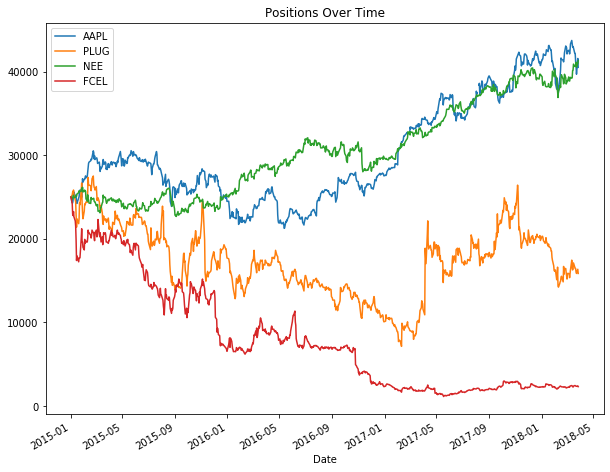

In [16]:
positions.plot(figsize=(10,7))
plt.title("Positions Over Time")

In [17]:
positions["Total Position"] = positions.sum(axis=1)

In [18]:
positions.head(4)

,AAPL,PLUG,NEE,FCEL,Total Position
Date,,,,,
2015-01-02,25000.000000,25000.000000,25000.000000,25000.000000,100000.000000
2015-01-05,24295.710235,25251.677852,24735.214172,24208.860759,98491.463019
2015-01-06,24297.996890,25587.248322,24831.286906,22943.037975,97659.570093
2015-01-07,24638.708497,25587.248322,25058.580935,22784.810127,98069.347881


Text(0.5, 1.0, 'Portfolio Value')

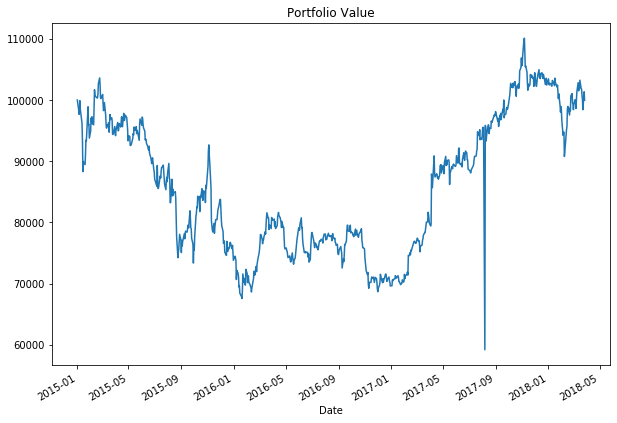

In [24]:
positions["Total Position"].plot(figsize=(10,7))
plt.title("Portfolio Value")

In [26]:
positions["Daily Return"] = positions["Total Position"].pct_change(1)

In [27]:
positions.head(3)

,AAPL,PLUG,NEE,FCEL,Total Position,Daily Return
Date,,,,,,
2015-01-02,25000.000000,25000.000000,25000.000000,25000.000000,100000.000000,NaN
2015-01-05,24295.710235,25251.677852,24735.214172,24208.860759,98491.463019,-0.015085
2015-01-06,24297.996890,25587.248322,24831.286906,22943.037975,97659.570093,-0.008446


In [31]:
positions["Daily Return"].mean()

0.000382830069727355

In [32]:
positions["Daily Return"].std()

0.02894321907940067

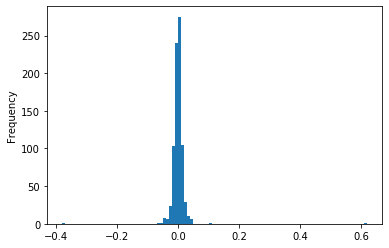

In [44]:
positions["Daily Return"].plot(kind="hist", figsize=(6,4), bins=100)

In [67]:
cumulative_returns = (100 * positions["Total Position"][-1] / positions["Total Position"][0] - 1)

In [68]:
cumulative_returns

98.98317889582843

In [69]:
positions["Total Position"][-1]

99983.17889582843

In [71]:
Expected_Portfolio_Return = positions["Daily Return"].mean()
Risk_Free_Return_Rate = .001 # Whatever your savings rate or T-Bill rate is
Portfolio_Standard_Deviation = positions["Daily Return"].std()

In [78]:
Sharpe_Ratio = (Expected_Portfolio_Return - Risk_Free_Return_Rate) / (Portfolio_Standard_Deviation)
Sharpe_Ratio

-0.021323472298625357

In [91]:
Daily = 252**0.5
Weekly = 52**0.5
Monthly = 12**0.5

In [100]:
Annualized_Sharpe_Ratio = Daily * Sharpe_Ratio

In [101]:
Annualized_Sharpe_Ratio

-0.3384996287432251